In [4]:
import sklearn
from sklearn import tree
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import  display

In [39]:
from IPython.display import  HTML
style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)

In [20]:
titanic_data = pd.read_csv('D:\\КУРСЫ DATA SCIENCE\\МОИ ЗАДАЧКИ\\Titanic\\train.csv',  encoding='utf-8')

In [21]:
titanic_data.head( )

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
titanic_data.isnull().sum( ) # считает сумму нулей в каждом столбике

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket' , 'Cabin'], axis = 1)
y = titanic_data.Survived
# axis = 1 значает, что удалятся столбцы, а не индексы датафрейма 
                      # Survived убрали, потому что будем ее предсказывать. ( Удаляем ненужные для предикшена столбцы)

In [24]:
X = pd.get_dummies (X) # конвертирует переменные (строчные) в числовые (0,1) автоматически

In [25]:
X. head ( )

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [26]:
X.Age.median( ) # средний возраст пассажиров , узнаем, чтобы заменить NANы (пропущенные значения) на медианные

28.0

In [27]:
X = X.fillna({'Age' : X.Age.median( )}) # заменяет все пропущенные значения в возрасте на средний возраст пассажиров(медианный)

In [28]:
X.isnull().sum( ) # проверяем наличие пропущенных значений в столбиках

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [29]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [30]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

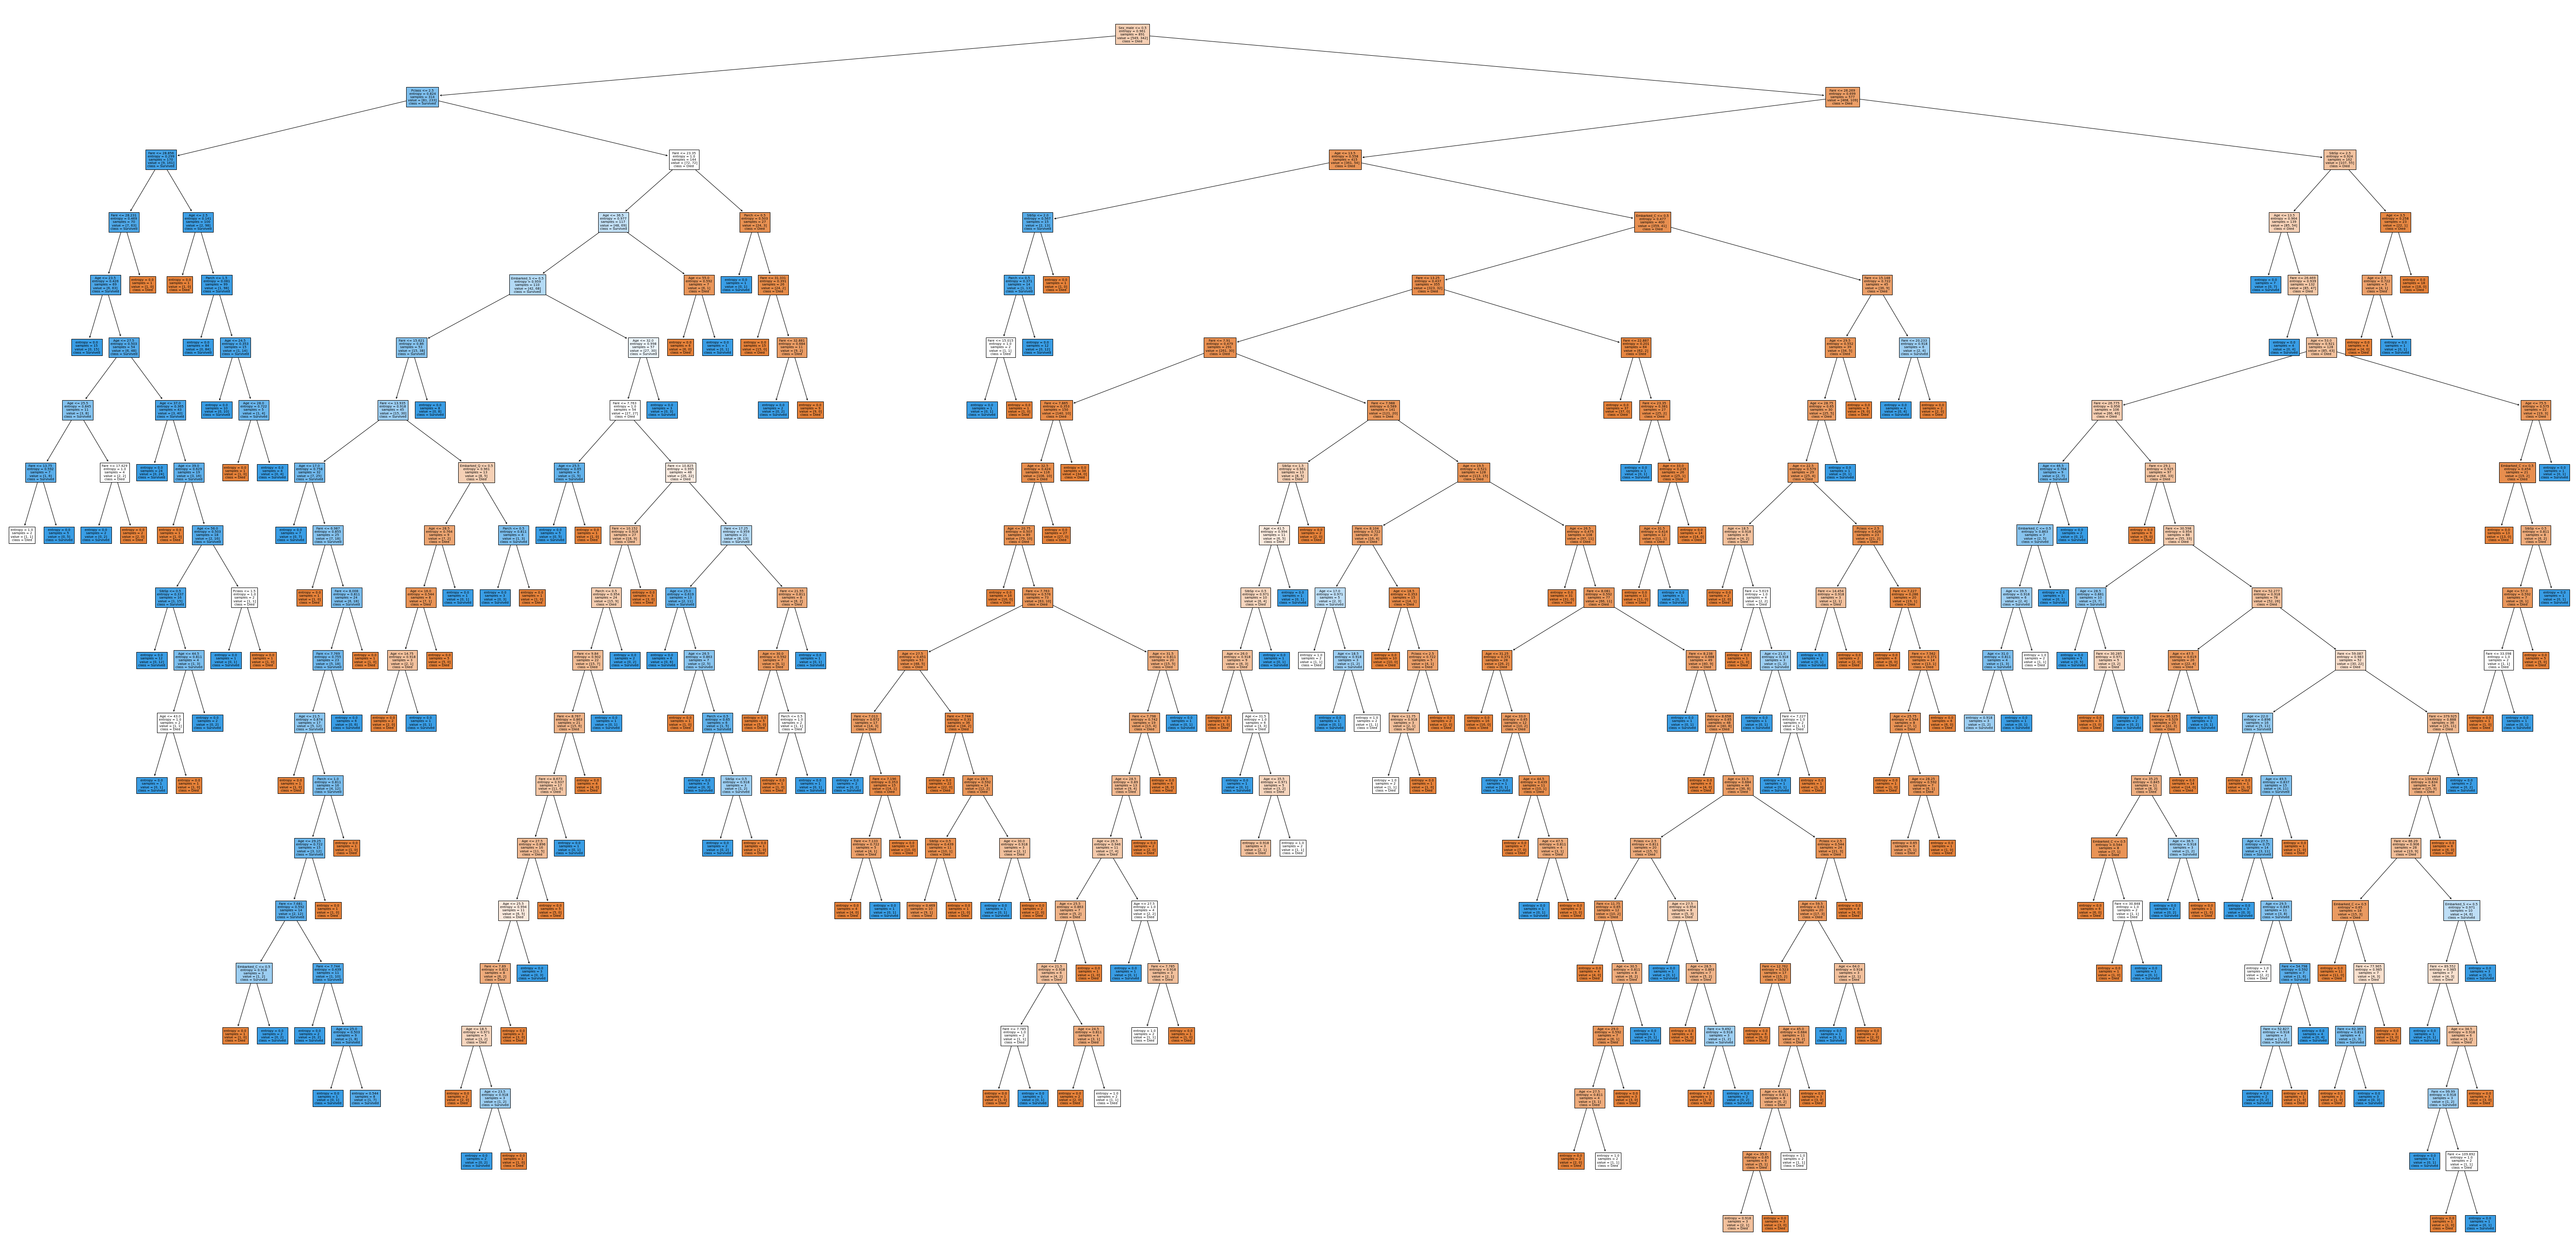

In [43]:
fig = plt.figure(figsize=(100,50))
_ = tree.plot_tree(clf,
                   feature_names=list(X),
                   class_names=['Died', 'Survived'],
                   filled=True,
                   fontsize=7)
fig.savefig("decision_tree.png")

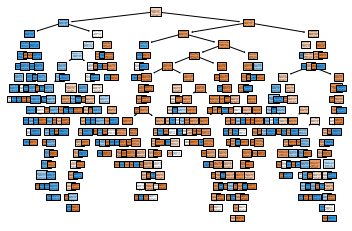

In [38]:
tree.plot_tree(clf, feature_names=list(X), class_names=['Died', 'Survived'],   filled=True);


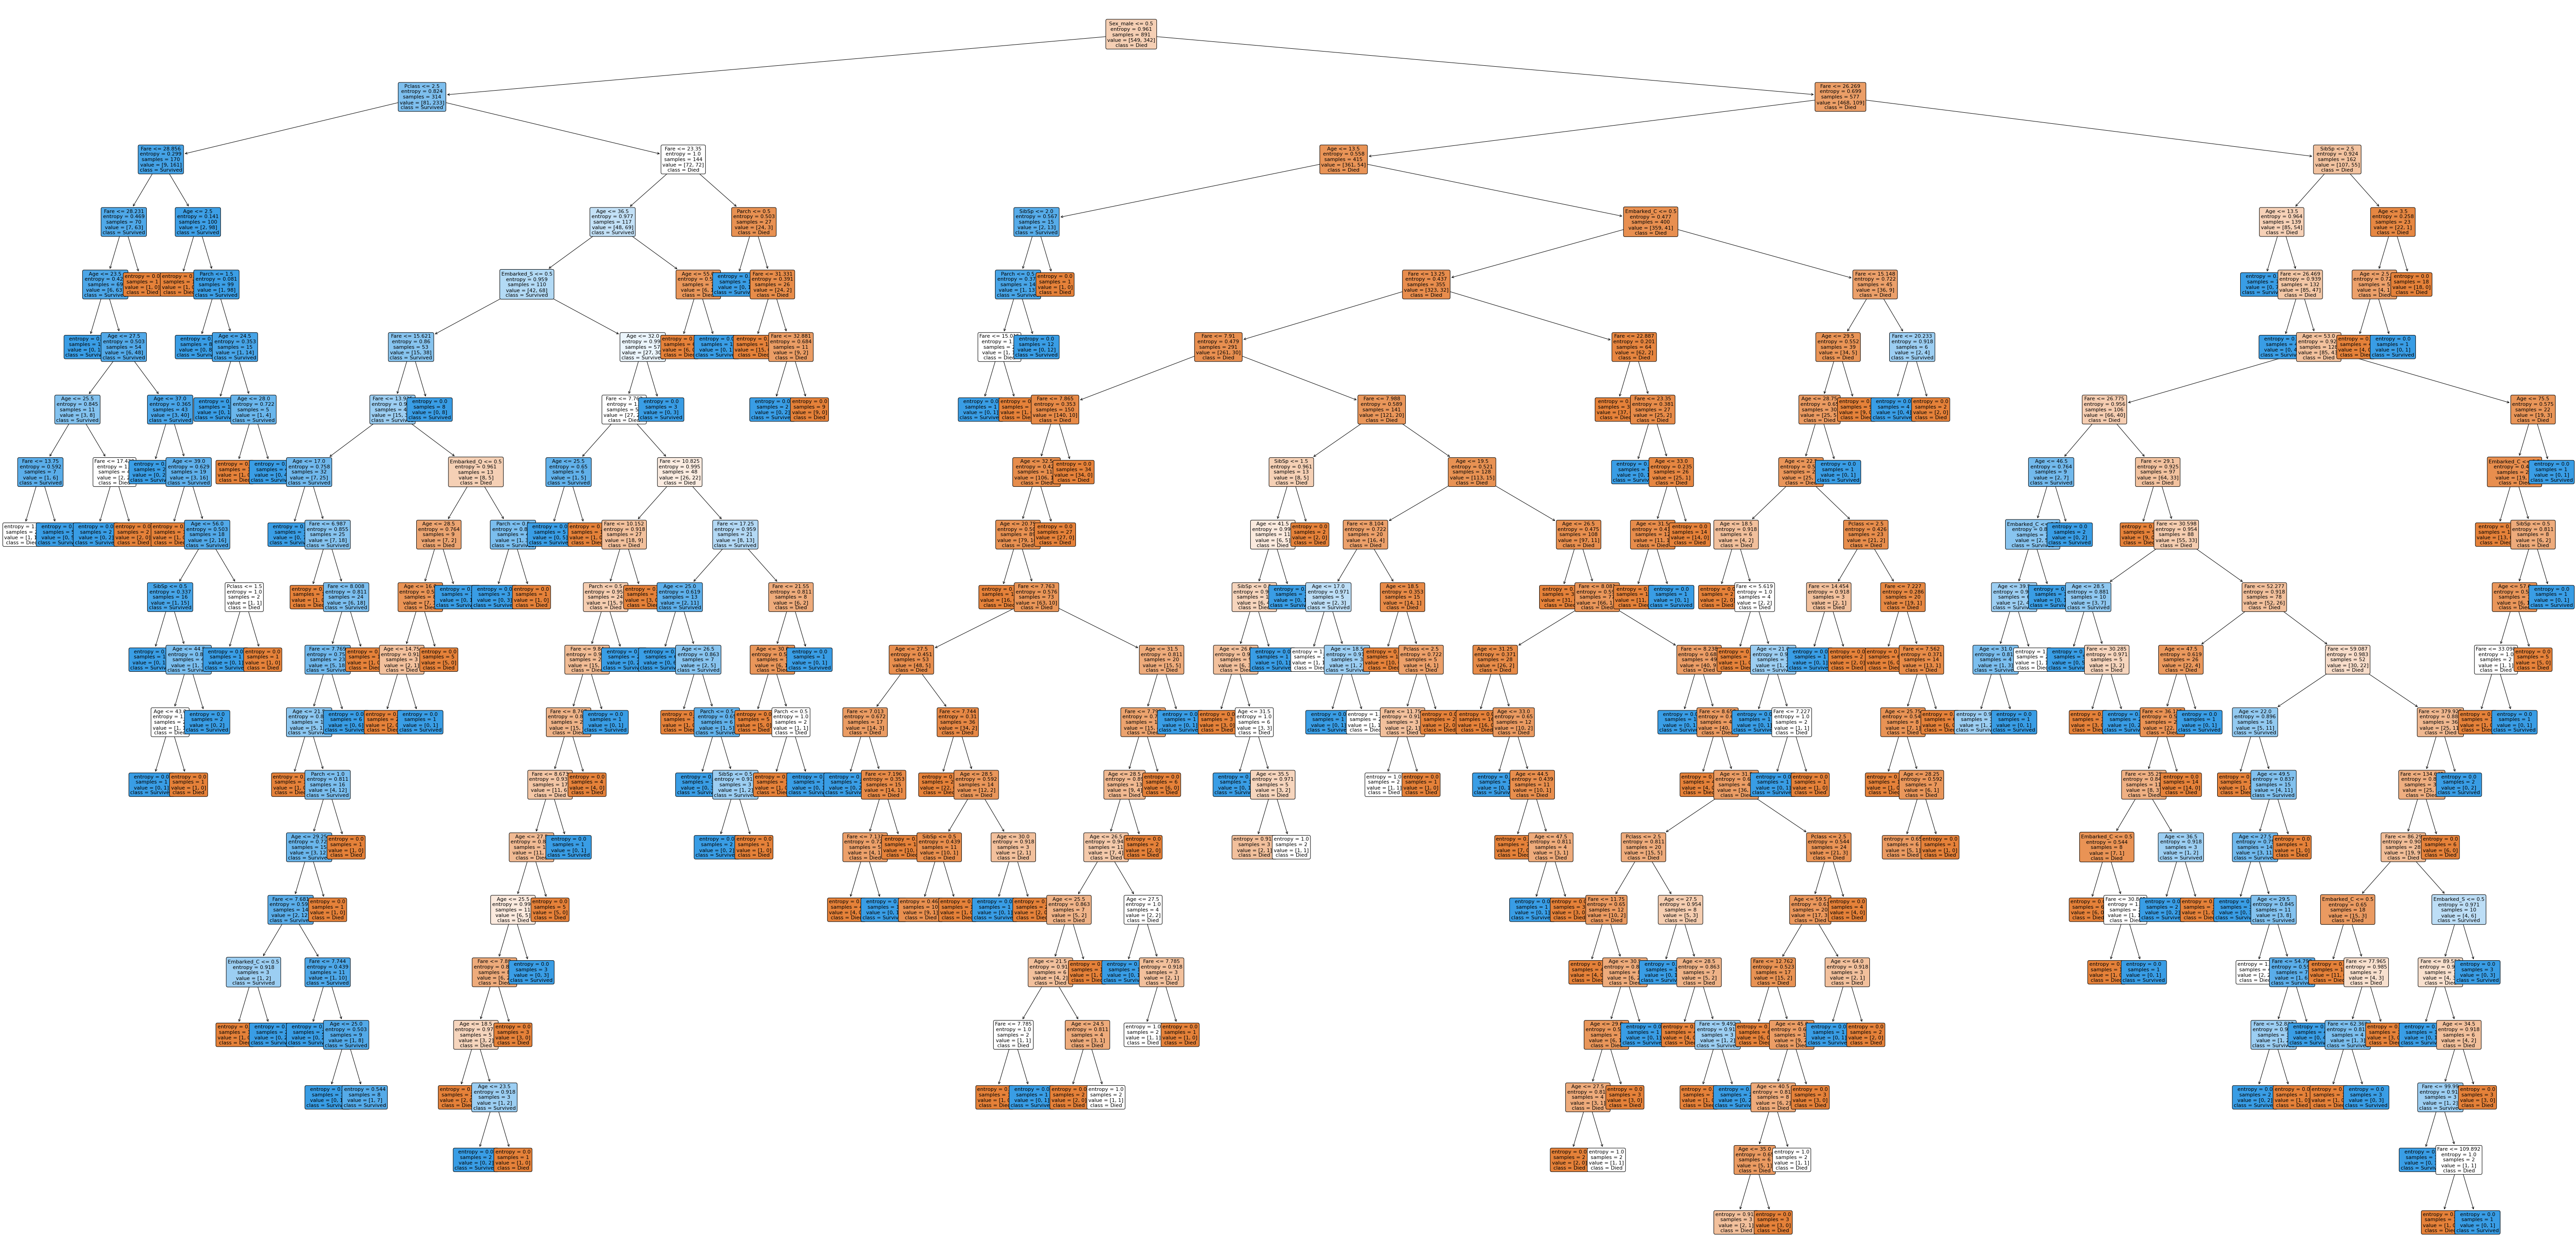

In [45]:
plt.figure(figsize=(100, 50))
tree.plot_tree(clf, 
               feature_names=list(X), 
               class_names=['Died', 'Survived'], 
               filled=True,
               rounded=True,
               fontsize = 11)
0
fig.savefig("decision_tree.png")

Модель получилась оверфиттинг (переобученна). Потому что максимально снимала энтропию. 
1) Попробуем протестировать дерево на тестировочной выборке.
2) оптимизируем кол-во слоев (уровней) , на которое дерево будет разрастаться.

In [46]:
X.head ( )

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [47]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.33, random_state=42) # 33% выборки из датафрейма пойдет на тестовую. 
# (42 - начальное значение рандомного генератора чисел)

In [53]:
clf.score(X, y) # число правильных ответов (в 97 процентах случаев)

0.9797979797979798

In [55]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [56]:
clf.score(X_train, y_train)

0.9798657718120806

In [57]:
clf.score(X_test, y_test) # точность правильных ответов, на данных, которое дерево наше не видело и не обучалось.

0.7762711864406779

Поэтому мы ограничим глубину дерева , т.к. наша модель переобучилась (она искала, как снизить энтропию до 0)

In [62]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=3)

In [63]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [64]:
clf.score(X_train, y_train)

0.8238255033557047

In [65]:
clf.score(X_test, y_test) # точность модели возрасла на 3х уровнях глубины обучения дерева решений

0.8203389830508474

In [69]:
max_depth_values = range (1, 100)

Для каждого значения глубины дерева в нашем массиве, инициируем классификатор с указанной глубиной, обучаться на трейн выборке и
предсказывать точность классификации на трейн выборке и на тестовой выборке.

In [70]:
scores_data = pd.DataFrame( )

In [71]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame( {'max_depth': [max_depth], 'train_score': [train_score], 'test_score' : [test_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [88]:
scores_data.head( )

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.806780


In [75]:
scores_data_long = pd.melt( scores_data, id_vars=['max_depth'],  value_vars=['train_score', 'test_score'],
                      var_name='set_type',   value_name='score' )

In [79]:
scores_data_long.head(10)

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
5,6,train_score,0.867450
6,7,train_score,0.882550
7,8,train_score,0.907718
8,9,train_score,0.917785
9,10,train_score,0.926174


<AxesSubplot:xlabel='max_depth', ylabel='score'>

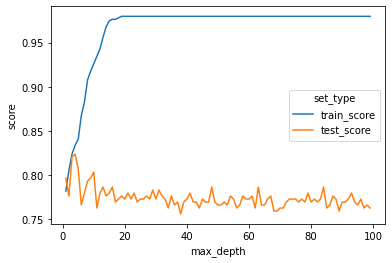

In [78]:
sns.lineplot(data=scores_data_long, x="max_depth", y="score", hue="set_type") # визуализируем, зависимость глубины обучения дерева от полученного значения 

In [89]:
from sklearn.model_selection import cross_val_score

In [90]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=4) # создадим снова классификатор с глубиной 4 и попробуем через кросс валидацию обуч. модель

In [91]:
cross_val_score(clf, X_train, y_train, cv = 5) # точность, полученная классификатором разделив трэйн выборки на 5 частей

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [93]:
cross_val_score(clf, X_train, y_train, cv = 5).mean( ) # средняя точность

0.7886274509803922

In [94]:
max_depth_values = range (1, 100)

In [95]:
scores_data = pd.DataFrame( )

In [96]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 5).mean( )
    
    temp_score_data = pd.DataFrame( {'max_depth': [max_depth], 
                                                              'train_score': [train_score], 
                                                               'test_score' : [test_score],
                                                                'cross_val_score': [mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [97]:
scores_data.head( )

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.803754


In [101]:
scores_data_long = pd.melt( scores_data, id_vars=['max_depth'],  value_vars=['train_score',
                                                                             'test_score',
                                                                             'cross_val_score'],
                      var_name='set_type',   value_name='score' )

In [106]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.803754
203,6,cross_val_score,0.803754
204,7,cross_val_score,0.800378
205,8,cross_val_score,0.802045
206,9,cross_val_score,0.793627
207,10,cross_val_score,0.805392


Исходя из полученных данных, видно, что при глубине дерева 10, мы получим максимально точный результат. 

<AxesSubplot:xlabel='max_depth', ylabel='score'>

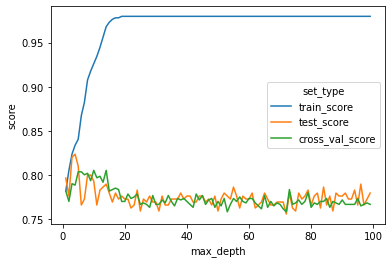

In [103]:
sns.lineplot(data=scores_data_long, x="max_depth", y="score", hue="set_type")

In [108]:
best_clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=10)

In [109]:
cross_val_score(clf, X_test, y_test, cv = 5).mean( )

0.7796610169491525